# Bias Variance Data Tradeoff

In [ ]:
import itertools
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression

## Generate data

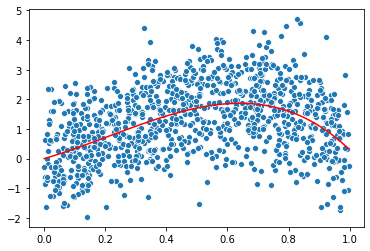

In [2]:
X = np.random.uniform(0, 1, 1000)
noise = np.random.normal(0,1,1000)
# true function f(x) = 10x - 5x^2 + 0.5x^3
true_function = 3*X + 4*X**2 -6*(X**3)-0.7*(X**4)
y=true_function+noise
sns.scatterplot(x=X, y=y)
sns.lineplot(x=X, y=true_function, color='r')
plt.show()

## Fit initial model

In [3]:
#features = X
features = np.column_stack((X, X**2, X**3, X**4, X**5, X**6, X**7, X**8))
assert(features[0,0]**3==features[0,2])
assert(features[0,0]**7==features[0,6])
targets = y

#split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=1)

#first fit a simple linear regression OR NOT
simple = LinearRegression()
simple.fit(X_train, y_train.reshape(-1,1))

# estimate bias and variance
mse, bias, var = bias_variance_decomp(simple, X_train,
                                      y_train, X_test,
                                      y_test, loss='mse', num_rounds=2000, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 1.115
Bias: 1.102
Variance: 0.012


In [4]:
r_2 = simple.score(X_test, y_test)
print(f'original model R^2 = {r_2}')

original model R^2 = 0.23994225620317777


# I don't know

In [5]:
# not really sure how to change this for multiple features
def truncate_fit_eval_linear(num_obs):
    features = X[:num_obs] # probably shouldn't reference X
    targets = y[:num_obs]
    #split the data into test and train sets
    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=1)

    #first fit a simple linear regression
    simple = LinearRegression()
    simple.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

    # estimate bias and variance
    mse, bias, var = bias_variance_decomp(simple, X_train.reshape(-1,1),
                                      y_train, X_test.reshape(-1,1),
                                      y_test, loss='mse', num_rounds=2000, random_seed=1)
    
    r_2 = simple.score(X_test.reshape(-1,1), y_test)
    return {'MSE': mse, 'Bias': bias, 'Variance': var, 'r^2': r_2}

In [6]:
truncate_fit_eval_linear(100)

{'MSE': 1.3870811043232687,
 'Bias': 1.344037821677514,
 'Variance': 0.043043282645755465,
 'r^2': 0.15042705480889873}

In [7]:
ldf = pd.DataFrame({'num_obs': [None], 'MSE': [None], 'Bias': [None], 'Variance': [None], 'r^2': [None]})
ddict = {'num_obs': [], 'MSE': [], 'Bias': [], 'Variance': [], 'r^2': []}
obs_vector = np.arange(5,10000,10)
for num in obs_vector[5:50]:
    new_dict = truncate_fit_eval_linear(num)
    ddict['num_obs'].append(num)
    ddict['MSE'].append(new_dict['MSE'])
    ddict['Bias'].append(new_dict['Bias'])
    ddict['Variance'].append(new_dict['Variance'])
    ddict['r^2'].append(new_dict['r^2'])

In [8]:
#ttt = pd.DataFrame({'num_obs': [1,2], 'MSE': [3,4], 'Bias': [5,6], 'Variance': [7,8], 'r^2': [9,10]})
#ttt.append({'num_obs': 5, 'MSE': 5, 'Bias': 5, 'Variance': 800, 'r^2': 9000}, ignore_index=True)
results = pd.DataFrame(ddict)

Text(0.5, 1.0, 'R^2')

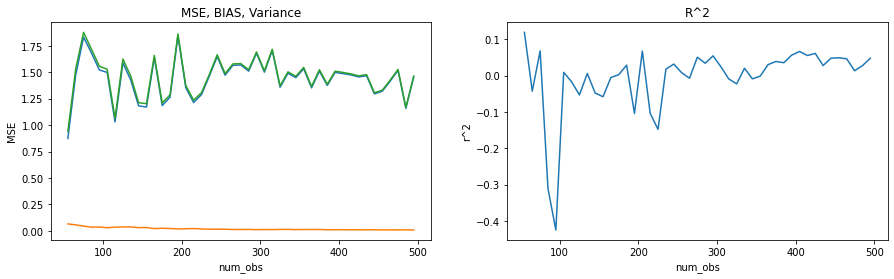

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4))

# results.head(5)
sns.lineplot(x='num_obs', y='Bias', data=results, ax=ax[0])
sns.lineplot(x='num_obs', y='Variance', data=results, ax=ax[0])
ax_plot1 = sns.lineplot(x='num_obs', y='MSE', data=results, ax=ax[0])
ax_plot1.set_title('MSE, BIAS, Variance')

ax_plot_2 = sns.lineplot(x='num_obs', y='r^2', data=results, ax=ax[1])
ax_plot_2.set_title("R^2")

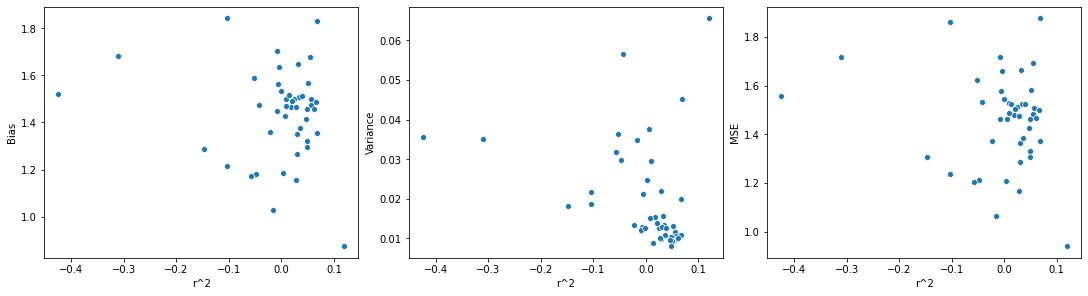

In [10]:
fig, ax = plt.subplots(ncols=3, figsize=(15,4), constrained_layout=True)
sns.relplot(x='r^2', y='Bias', data=results, ax=ax[0])
sns.relplot(x='r^2', y='Variance', data=results, ax=ax[1])
sns.relplot(x='r^2', y='MSE', data=results, ax=ax[2])
plt.close(2)
plt.close(3)
plt.close(4)
plt.show()

# Model Complexity stuff
will take forever

In [47]:
#features = X
features = np.column_stack((X, X**2, X**3, X**4, X**5, X**6, X**7, X**8))
assert(features[0,0]**3==features[0,2])
# assert(features[0,0]**7==features[0,6])
targets = y

# split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=1)

# normalize
## training features
print("\ntrain features pre normalization")
print(X_train.mean(axis=0))
print(X_train.std(axis=0))
scaler = scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

print("\ntrain features post normalization")
print(X_train.mean(axis=0))
print(X_train.std(axis=0))

## test features
print("\ntest features pre normalization")
print(X_test.mean(axis=0))
print(X_test.std(axis=0))
X_test = scaler.transform(X_test)

print("\ntest features post normalization")
print(X_test.mean(axis=0))
print(X_test.std(axis=0))


train features pre normalization
[0.50104315 0.33272876 0.24773853 0.19624975 0.16167704 0.13688394
 0.11827086 0.10381609]
[0.28580504 0.29247447 0.27479003 0.25554282 0.23826615 0.22330525
 0.21038143 0.19913745]

train features post normalization
[ 2.56428378e-15  1.91836596e-15 -1.17252808e-15 -2.91972085e-16
 -2.59245361e-16  1.81156914e-16  1.01080007e-17 -3.73452306e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]

test features pre normalization
[0.45978629 0.28680103 0.20494507 0.15795676 0.12772967 0.10675809
 0.09140065 0.0796882 ]
[0.27458624 0.27513983 0.25447122 0.23396125 0.21610991 0.2007848
 0.18750987 0.17586661]

test features post normalization
[-0.14435317 -0.15703157 -0.15573147 -0.14984959 -0.14247668 -0.13490885
 -0.12772139 -0.12116199]
[0.96074667 0.94073108 0.92605696 0.91554618 0.90701056 0.89914945
 0.89128526 0.88314182]


In [83]:
alphas = np.linspace(0,5,100)
ddict = {'alpha': [], 'MSE': [], 'Bias': [], 'Variance': [], 'r^2': [],
         'intercept':[],
        }
coefs_dict = {'coef_'+str(i+1):[] for i in range(X_train.shape[1])}

ddict.update(coefs_dict)
for alpha in alphas:
    rg = linear_model.Ridge(alpha=alpha)   
    rg.fit(X_train, y_train.reshape(-1,1))

    # estimate bias and variance
    mse, bias, var = bias_variance_decomp(rg, X_train,
                                          y_train, X_test,
                                          y_test, loss='mse', num_rounds=2000, random_seed=1)
    
    r_2 = rg.score(X_test, y_test)
    new_dict = {'MSE': mse, 'Bias': bias, 'Variance': var, 'r^2': r_2}
    ddict['alpha'].append(alpha)
    ddict['MSE'].append(new_dict['MSE'])
    ddict['Bias'].append(new_dict['Bias'])
    ddict['Variance'].append(new_dict['Variance'])
    ddict['r^2'].append(new_dict['r^2'])
    ddict['intercept'].append(rg.intercept_)
    
    for i in range(len(rg.coef_)):
        coef_key = 'coef_'+str(i+1)
        ddict[coef_key] = rg.coef_[i]
    

In [84]:
results = pd.DataFrame(ddict)
results.head(n=10)

,alpha,MSE,Bias,Variance,r^2,intercept,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8
0,0.000000,1.114547,1.102338,0.012208,0.239942,1.254906,0.935515,0.220601,-0.169381,-0.2592,-0.228624,-0.168107,-0.111504,-0.067803
1,0.050505,1.098951,1.092000,0.006951,0.255448,1.254040,0.935515,0.220601,-0.169381,-0.2592,-0.228624,-0.168107,-0.111504,-0.067803
2,0.101010,1.098664,1.091948,0.006716,0.255550,1.254025,0.935515,0.220601,-0.169381,-0.2592,-0.228624,-0.168107,-0.111504,-0.067803
3,0.151515,1.098540,1.091969,0.006571,0.255529,1.254010,0.935515,0.220601,-0.169381,-0.2592,-0.228624,-0.168107,-0.111504,-0.067803
4,0.202020,1.098462,1.092003,0.006459,0.255491,1.253996,0.935515,0.220601,-0.169381,-0.2592,-0.228624,-0.168107,-0.111504,-0.067803
5,0.252525,1.098405,1.092040,0.006365,0.255451,1.253982,0.935515,0.220601,-0.169381,-0.2592,-0.228624,-0.168107,-0.111504,-0.067803
6,0.303030,1.098363,1.092078,0.006284,0.255411,1.253968,0.935515,0.220601,-0.169381,-0.2592,-0.228624,-0.168107,-0.111504,-0.067803
7,0.353535,1.098331,1.092117,0.006214,0.255372,1.253955,0.935515,0.220601,-0.169381,-0.2592,-0.228624,-0.168107,-0.111504,-0.067803
8,0.404040,1.098308,1.092156,0.006151,0.255335,1.253941,0.935515,0.220601,-0.169381,-0.2592,-0.228624,-0.168107,-0.111504,-0.067803
9,0.454545,1.098291,1.092196,0.006096,0.255298,1.253927,0.935515,0.220601,-0.169381,-0.2592,-0.228624,-0.168107,-0.111504,-0.067803


Text(0.5, 1.0, 'R^2')

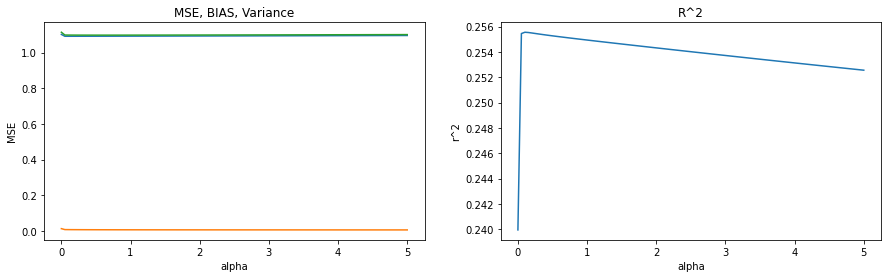

In [85]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4))

# results.head(5)
sns.lineplot(x='alpha', y='Bias', data=results, ax=ax[0])
sns.lineplot(x='alpha', y='Variance', data=results, ax=ax[0])
ax_plot1 = sns.lineplot(x='alpha', y='MSE', data=results, ax=ax[0])
ax_plot1.set_title('MSE, BIAS, Variance')

ax_plot_2 = sns.lineplot(x='alpha', y='r^2', data=results, ax=ax[1])
ax_plot_2.set_title("R^2")

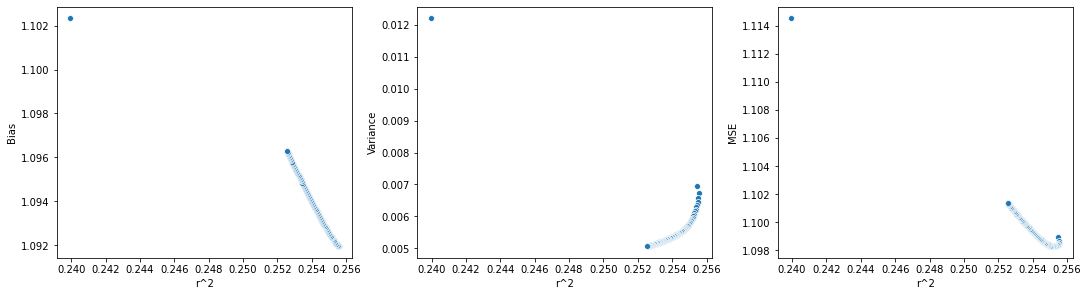

In [86]:
fig, ax = plt.subplots(ncols=3, figsize=(15,4), constrained_layout=True)
sns.relplot(x='r^2', y='Bias', data=results, ax=ax[0])
sns.relplot(x='r^2', y='Variance', data=results, ax=ax[1])
sns.relplot(x='r^2', y='MSE', data=results, ax=ax[2])
plt.close(2)
plt.close(3)
plt.close(4)
plt.show()

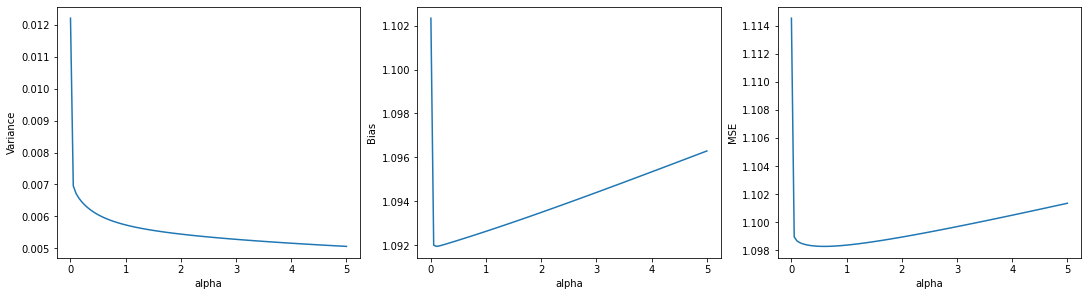

In [87]:
fig, ax = plt.subplots(ncols=3, figsize=(15,4), constrained_layout=True)
sns.lineplot(x='alpha', y='Variance', data=results, ax=ax[0])
sns.lineplot(x='alpha', y='Bias', data=results, ax=ax[1])
sns.lineplot(x='alpha', y='MSE', data=results, ax=ax[2])
plt.show()

In [88]:
results['alpha'][results['MSE']==results['MSE'].min()]

12    0.606061
Name: alpha, dtype: float64

Text(0.5, 1.0, 'Coef estimate by alpha')

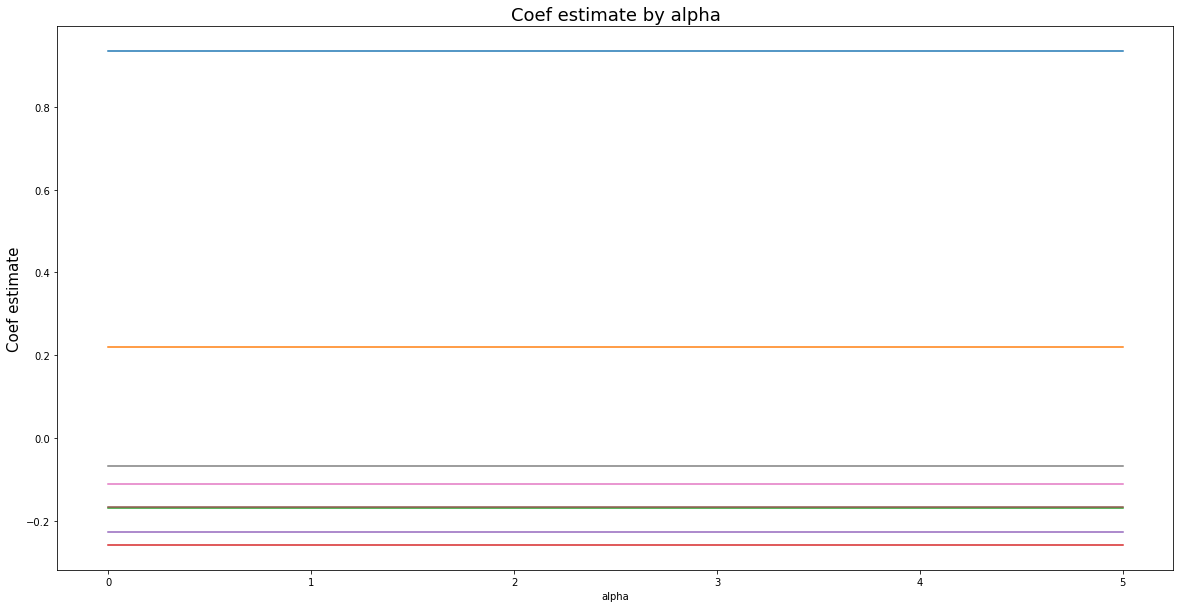

In [89]:
plt.figure(figsize=(20,10))
for i in range(X_train.shape[1]):
    var_name = 'coef_'+str(i+1)
    sns.lineplot(x='alpha', y=var_name, data=results)
plt.ylabel("Coef estimate", size=15)
plt.title("Coef estimate by alpha", size=18)

Text(0.5, 1.0, 'intercept estimate by alpha')

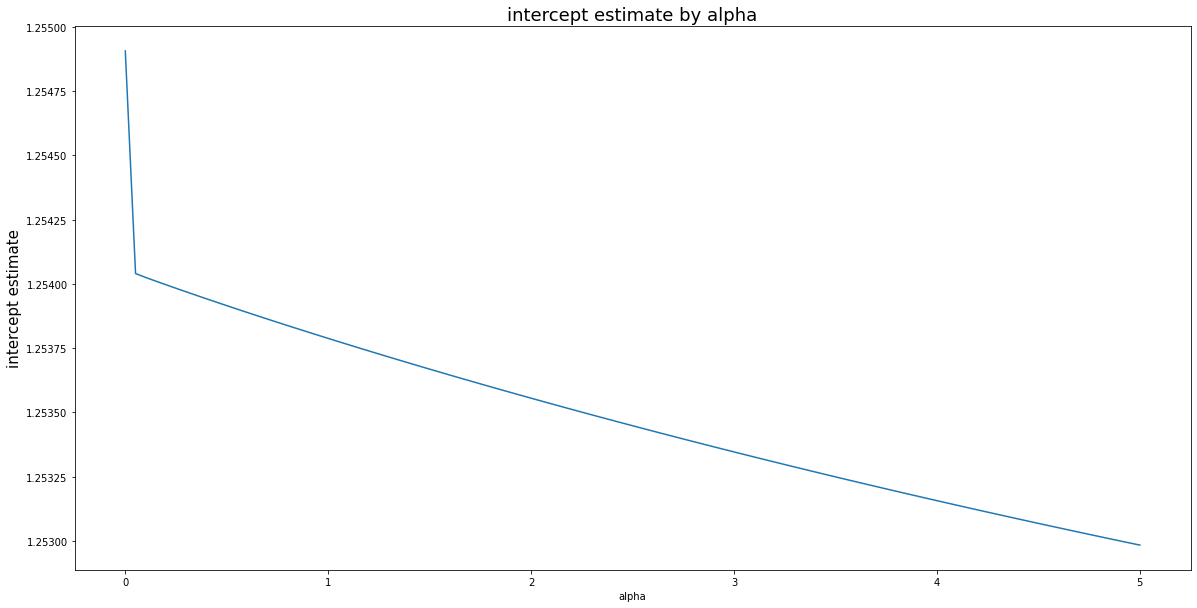

In [90]:
plt.figure(figsize=(20,10))
sns.lineplot(x='alpha', y='intercept', data=results)
plt.ylabel("intercept estimate", size=15)
plt.title("intercept estimate by alpha", size=18)